In [1]:
import torch

In [96]:
w2 = torch.tensor([
    [.9, 0.5]
]).float()

In [105]:
n = 100
x = torch.randn(100, 2)
y = x[:,0] / 2 + x[:,1] /2

In [106]:
ls = torch.linalg.inv(x.T @ x) @ x.T @ y

In [107]:
ls

tensor([0.5000, 0.5000])

In [108]:
ls.unsqueeze(0)

tensor([[0.5000, 0.5000]])

In [109]:
w2.T

tensor([[0.9000],
        [0.5000]])

In [110]:
w1 = torch.outer(ls, w2.view(2)) / torch.norm(w2)

In [111]:
w1

tensor([[0.4371, 0.2428],
        [0.4371, 0.2428]])

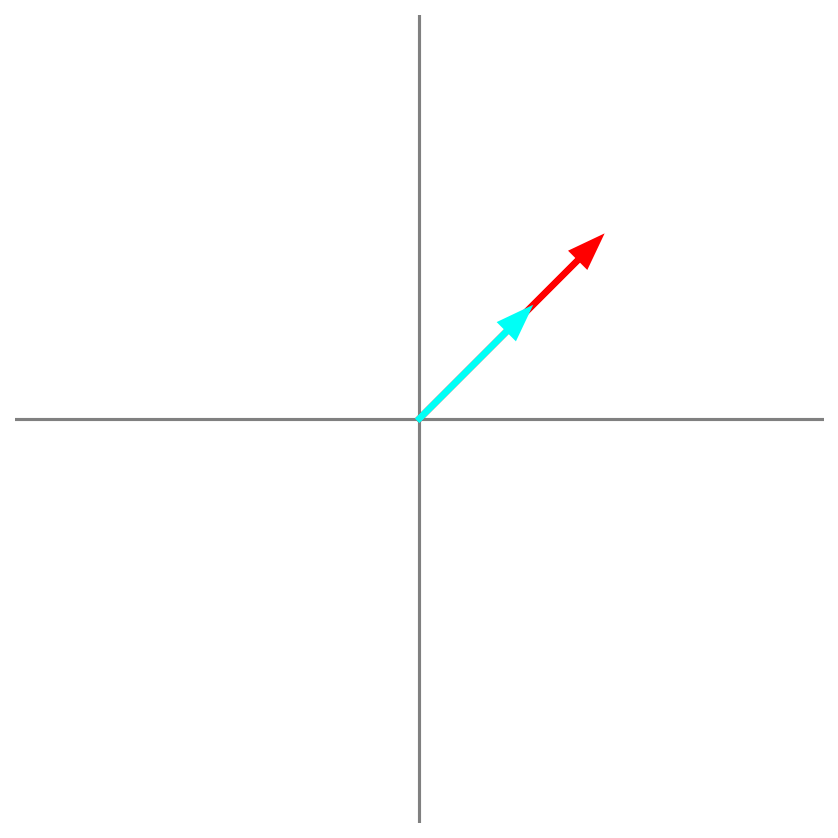

In [122]:
plot_colored_vectors(w1.T)

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def plot_colored_vectors(vectors):
    """
    Plot n 2D vectors (rows of `vectors`) from the origin in a colorful rainbow style.
    
    Args:
        vectors: numpy array of shape (n, 2)
    """
    n = vectors.shape[0]
    colors = plt.cm.hsv(np.linspace(0, 1, n, endpoint=False))

    fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
    ax.set_facecolor("white")

    # Draw dark x and y axes FIRST, with low z-order
    ax.axhline(0, color="gray", lw=1.5, zorder=0)
    ax.axvline(0, color="gray", lw=1.5, zorder=0)

    # Plot vectors on top
    for i in range(n):
        v = vectors[i]
        ax.arrow(
            0, 0, v[0], v[1],
            head_width=0.05, head_length=0.07,
            fc=colors[i], ec=colors[i],
            linewidth=3, alpha=1,
            zorder=5  # ensure arrows are on top
        )

    # Set limits
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    # Remove spines and ticks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_aspect("equal", adjustable="box")
    plt.show()